In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Hitesh TSA (CSE471) LAB Work/DATASETs/LAB 10/GOOG.csv')

In [16]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-09,117.989998,118.199997,116.559998,117.500000,117.500000,15424300
1,2022-08-10,119.589996,121.779999,119.360001,120.650002,120.650002,20497000
2,2022-08-11,122.080002,122.339996,119.550003,119.820000,119.820000,16671600
3,2022-08-12,121.160004,122.650002,120.400002,122.650002,122.650002,16121100
4,2022-08-15,122.209999,123.260002,121.570000,122.879997,122.879997,15525000
...,...,...,...,...,...,...,...
246,2023-08-02,129.839996,130.419998,127.849998,128.639999,128.639999,22705800
247,2023-08-03,128.369995,129.770004,127.775002,128.770004,128.770004,15018100
248,2023-08-04,129.600006,131.929993,128.315002,128.539993,128.539993,20509500
249,2023-08-07,129.509995,132.059998,129.429993,131.940002,131.940002,17621000


In [17]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense, Dropout
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [18]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
df    = df.loc[:,["Open"]].values
train = df[:len(df)-50]
test = df[len(train):]
# reshape
train = train.reshape(train.shape[0],1)

In [20]:
train.shape

(201, 1)

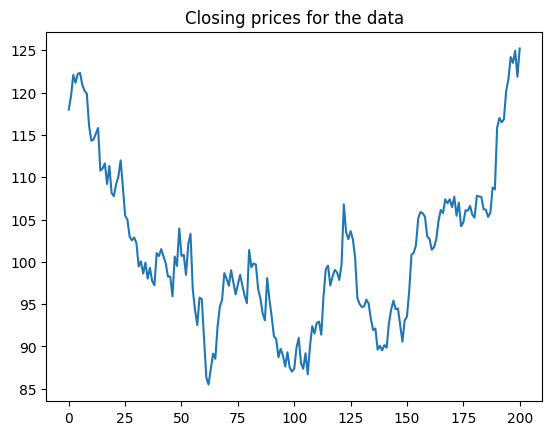

In [21]:
plt.plot(train);
plt.title("Closing prices for the data");

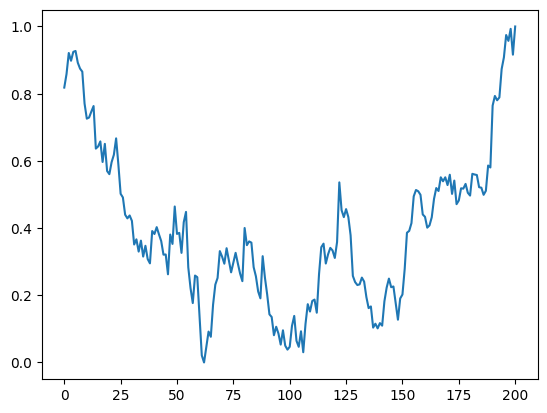

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train

plt.plot(train_scaled)
plt.show()

In [25]:
# We add first 50 location to "X_train" and we 51. location to "y_train" .
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

In [26]:
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
5/5 [==============================] - 8s 49ms/step - loss: 0.5492
Epoch 2/100
5/5 [==============================] - 0s 48ms/step - loss: 0.3743
Epoch 3/100
5/5 [==============================] - 0s 45ms/step - loss: 0.4023
Epoch 4/100
5/5 [==============================] - 0s 67ms/step - loss: 0.2737
Epoch 5/100
5/5 [==============================] - 0s 83ms/step - loss: 0.2703
Epoch 6/100
5/5 [==============================] - 0s 90ms/step - loss: 0.2487
Epoch 7/100
5/5 [==============================] - 0s 82ms/step - loss: 0.3351
Epoch 8/100
5/5 [==============================] - 0s 78ms/step - loss: 0.2058
Epoch 9/100
5/5 [==============================] - 0s 80ms/step - loss: 0.2488
Epoch 10/100
5/5 [==============================] - 0s 87ms/step - loss: 0.3697
Epoch 11/100
5/5 [==============================] - 0s 93ms/step - loss: 0.2268
Epoch 12/100
5/5 [==============================] - 0s 91ms/step - loss: 0.2558
Epoch 13/100
5/5 [==============================]

In [27]:
inputs = df[len(df) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scaler

In [28]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0]) # 0 dan 50 ye, 1 den 51 e gibi kaydirarark 50 eleman aliyoruz
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

2/2 [==============================] - 1s 29ms/step


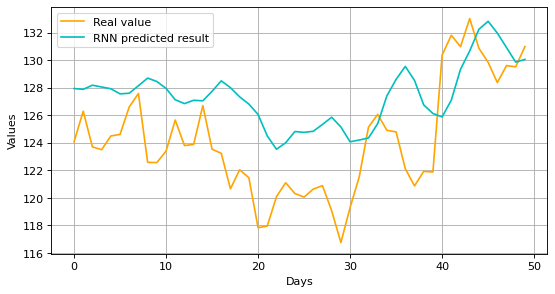

In [30]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [32]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='Adam')
model.fit(X_train,y_train,epochs=50, batch_size=1)

Epoch 1/50
151/151 [==============================] - 4s 9ms/step - loss: 0.0897
Epoch 2/50
151/151 [==============================] - 2s 15ms/step - loss: 0.0258
Epoch 3/50
151/151 [==============================] - 4s 27ms/step - loss: 0.0179
Epoch 4/50
151/151 [==============================] - 3s 21ms/step - loss: 0.0142
Epoch 5/50
151/151 [==============================] - 2s 10ms/step - loss: 0.0120
Epoch 6/50
151/151 [==============================] - 2s 10ms/step - loss: 0.0103
Epoch 7/50
151/151 [==============================] - 2s 11ms/step - loss: 0.0092
Epoch 8/50
151/151 [==============================] - 1s 9ms/step - loss: 0.0086
Epoch 9/50
151/151 [==============================] - 2s 11ms/step - loss: 0.0082
Epoch 10/50
151/151 [==============================] - 2s 13ms/step - loss: 0.0073
Epoch 11/50
151/151 [==============================] - 4s 25ms/step - loss: 0.0071
Epoch 12/50
151/151 [==============================] - 2s 12ms/step - loss: 0.0064
Epoch 13/50
151

In [33]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

2/2 [==============================] - 0s 9ms/step


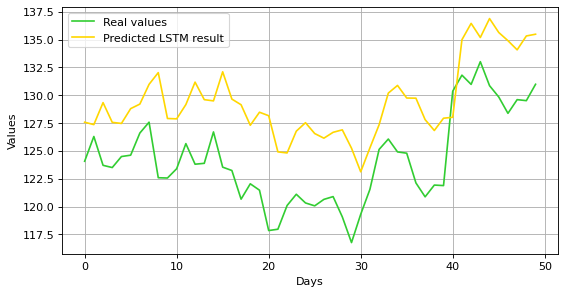

In [34]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_data2,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

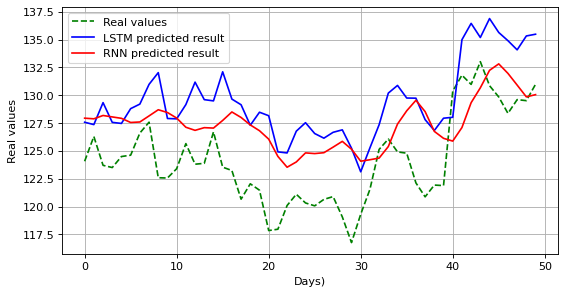

In [35]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="green", linestyle='dashed',label="Real values")
plt.plot(predicted_data2,color="blue", label="LSTM predicted result")
plt.plot(predicted_data,color="red",label="RNN predicted result") # ben ekledim
plt.legend()
plt.xlabel("Days)")
plt.ylabel("Real values")
plt.grid(True)
plt.show()